In [1]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
# what are draws from the distribution over functions defined by 
# a randomly initialized deep MLP?

class MLP():
    def __init__(self,layer_sizes=[1,10,10,1],activation_fxn=np.tanh):
        self.weights = []
        
        for i in range(len(layer_sizes)-1):
            x,y = layer_sizes[i],layer_sizes[i+1]
            self.weights.append((npr.randn(x,y),npr.randn(y)))
        self.activation_fxn = activation_fxn
   
    def predict(self,x):
        activations = x
        
        for w,b in self.weights:
            activations = self.activation_fxn(np.dot(activations,w) + b)
            #x,y = layer_sizes[i],layer_sizes[i+1]
            #self.weights.append((npr.randn(x,y),npr.randn(y)))
        return activations

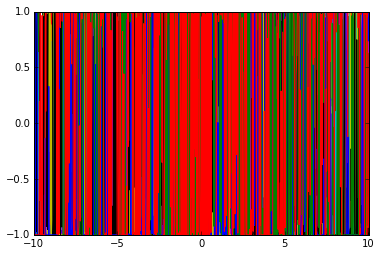

In [171]:
#mlp = MLP([10,10,10,1])
npr.seed(0)
n=1000
size=10
x = np.reshape(np.linspace(-size,size,n),(n,1))
num_draws=1000
num_draws_to_plot=10
hidden_dim=100
depth=10
mlps = []
ys = []
input_dim=1
output_dim=1
for i in range(num_draws):
    mlp = MLP([input_dim] + [hidden_dim]*depth + [output_dim])
    y = mlp.predict(x)
    ys.append(y)
    mlps.append(mlp)
    if i < num_draws_to_plot:
        plt.plot(x,y)

    
def analyze(y):
    # compute some statistics of this function,
    # e.g. variance, autocorrelations, etc.
    
    return np.var(y)

stats = np.array([analyze(y) for y in ys])

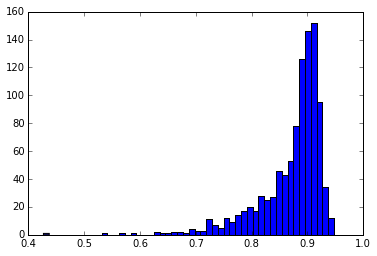

In [172]:
plt.hist(stats,bins=50);

In [173]:
# hmm, interesting: 

In [174]:
def autocorr(y,tau=1):
    return np.correlate(y[tau:,0],y[:-tau,0]) / (len(y)-tau)

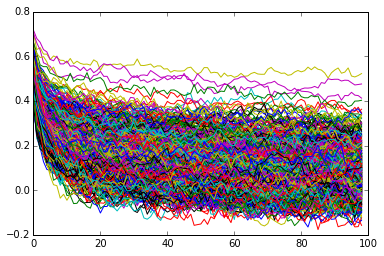

In [175]:
autocorrs = []
for y in ys:
    a = np.array([autocorr(y,tau) for tau in range(1,100)])
    plt.plot(a)
    autocorrs.append(a)
autocorrs = np.array(autocorrs)

((99,), (99,))


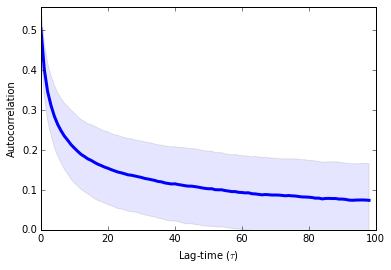

In [176]:
def plot_mean_plus_minus(array):
    mu,sig = array.mean(0)[:,0],array.std(0)[:,0]
    print(mu.shape,sig.shape)
    mu-sig
    plt.fill_between(range(len(mu)),mu-sig,mu+sig,alpha=0.1)
    plt.plot(mu,linewidth=3)
    plt.ylim(0,np.max(mu+sig))
plot_mean_plus_minus(autocorrs)
plt.xlabel(r'Lag-time ($\tau$)')
plt.ylabel('Autocorrelation')